<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center"> Приветствие<a class="tocSkip"> </h2>
Привет, меня зовут Никита. Рад, что ты проверишь мою работу :) Надеюсь все будет понятно, и работа выполена правильно. Также хочу заметить, что может не заработать с 1 раза всё из-за того, что sklearn не той версии, которая нужна. Нужно запустить обновление sklearn и перезагрузить всё :)

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера:</b> 
    
Никита, привет! Меня зовут Бунакова Влада. Приятно познакомиться :)

Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='orange'>желтый — «хорошо, но можно лучше (один-два таких замечаний допустимы, но если их больше — придется исправлять)»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###». Пожалуйста, не удаляй мои комментарии, они мне нужны при повторной проверке. Будет здорово, если в своих новых комментариях (выделяй их другим цветом) ты напишешь о сделанных тобой изменениях в коде. 



<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2:</b>    
    
Никита, спасибо за доработки! Осталось два замечания.

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v3:</b>  
    
Никита, проект принимаю 👍

# Описание проекта

Заказчик этого исследования — сеть отелей «Как в гостях».

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.

Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — **80%** от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.
В
отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.
Стоимость номеров отеля:

**категория A: за ночь — 1 000, разовое обслуживание — 400;**

**категория B: за ночь — 800, разовое обслуживание — 350;**

**категория C: за ночь — 600, разовое обслуживание — 350;**

**категория D: за ночь — 550, разовое обслуживание — 150;**

**категория E: за ночь — 500, разовое обслуживание — 150;**

**категория F: за ночь — 450, разовое обслуживание — 150;**

**категория G: за ночь — 350, разовое обслуживание — 150.**

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на **20%**, летом — на **40%**.

На разработку системы прогнозирования заложен бюджет — **400 000**. При этом необходимо учесть, что внедрение модели должно окупиться за год. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

In [1]:
# импортирую нужные библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate
from sklearn import metrics
import numpy as np

### Шаг 1. Откройте файлы с данными

In [2]:
# загружаю и просматриваю датасет
df_train = pd.read_csv('/datasets/hotel_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
id                                65229 non-null int64
is_canceled                       65229 non-null int64
lead_time                         65229 non-null float64
arrival_date_year                 65229 non-null int64
arrival_date_month                65229 non-null object
arrival_date_week_number          65229 non-null int64
arrival_date_day_of_month         65229 non-null int64
stays_in_weekend_nights           65229 non-null int64
stays_in_week_nights              65229 non-null int64
adults                            65229 non-null float64
children                          65229 non-null float64
babies                            65229 non-null float64
meal                              65229 non-null object
country                           65229 non-null object
distribution_channel              65229 non-null object
is_repeated_guest                 65229 non-null int64

In [3]:
df_train.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


In [4]:
# загружаю и просматриваю датасет
df_test = pd.read_csv('/datasets/hotel_test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
id                                32412 non-null int64
is_canceled                       32412 non-null int64
lead_time                         32412 non-null float64
arrival_date_year                 32412 non-null int64
arrival_date_month                32412 non-null object
arrival_date_week_number          32412 non-null int64
arrival_date_day_of_month         32412 non-null int64
stays_in_weekend_nights           32412 non-null int64
stays_in_week_nights              32412 non-null int64
adults                            32412 non-null float64
children                          32412 non-null float64
babies                            32412 non-null float64
meal                              32412 non-null object
country                           32412 non-null object
distribution_channel              32412 non-null object
is_repeated_guest                 32412 non-null int64

In [5]:
df_test.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


Согласно документации к данным:
* `id` — номер записи;
* `adults` — количество взрослых постояльцев;  
* `arrival_date_year` — год заезда;
* `arrival_date_month` — месяц заезда;
* `arrival_date_week_number ` — неделя заезда;
* `arrival_date_day_of_month` — день заезда;
* `babies` — количество младенцев;
* `booking_changes` — количество изменений параметров заказа;
* `children` — количество детей от 3 до 14 лет;
* `country` — гражданство постояльца;
* `customer_type` — тип заказчика:
`Contract` - договор с юридическим лицом, `Group` - групповой заезд, 
`Transient` - не связано с договором или групповым заездом,
`Transient-party` - не связано с договором или групповым заездом, но связано с бронированием типа Transient
* `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
* `distribution_channel` — канал дистрибуции заказа;
* `is_canceled` — отмена заказа;
* `is_repeated_guest` — признак того, что гость бронирует номер второй раз;
* `lead_time` — количество дней между датой бронирования и датой прибытия;
* `meal` — опции заказа:
`SC` - нет дополнительных опций, `BB` - включён завтрак, 
`HB` - включён завтрак и обед, `FB` - включён завтрак, обед и ужин
* `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
* `previous_cancellations` — количество отменённых заказов у клиента;
* `required_car_parking_spaces` — необходимость места для автомобиля;
* `reserved_room_type` — тип забронированной комнаты;
* `stays_in_weekend_nights` — количество ночей в выходные дни;
* `stays_in_week_nights` — количество ночей в будние дни;
* `total_nights` — общее количество ночей;
* `total_of_special_requests` — количество специальных отметок.


### Шаг 2. Предобработка и исследовательский анализ данных

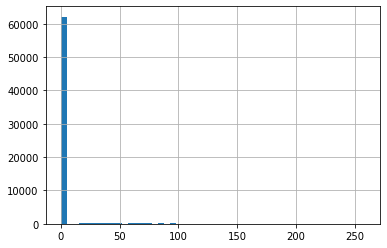

In [6]:
# строю гистограмму, чтобы найти выбросы
df_train['days_in_waiting_list'].hist(bins=50);

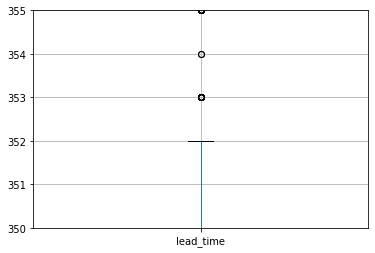

In [7]:
# строю диаграмму размаха для нахождения выбросов
plt.ylim(350, 355)
df_train.boxplot('lead_time', figsize=(10, 8));

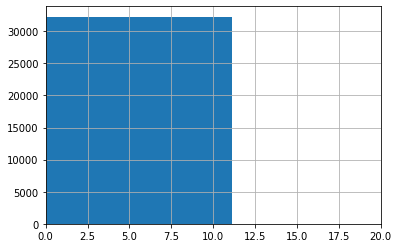

In [8]:
# строю гистограмму, чтобы найти выбросы
plt.xlim(0, 20)
df_test['days_in_waiting_list'].hist(bins=20);

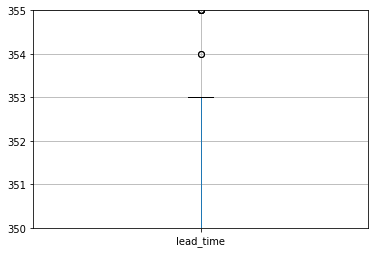

In [9]:
# строю диаграмму размаха для нахождения выбросов
plt.ylim(350, 355)
df_test.boxplot('lead_time', figsize=(10, 8));

In [10]:
# пишу функцию для предобработки данных

def start_processing(df, babies, adults, lead_time, days_in_waiting_list):
    index_del = (list(df[df['babies'] > babies].index) 
                 + list(df[df['adults'] == adults].index) 
                 + list(df[df['lead_time'] > lead_time].index) 
                 + list(df[df['days_in_waiting_list'] > days_in_waiting_list].index))
    df = df.drop(columns=['id'], axis=0)
    df = df.drop(index_del, axis=0)
    df['meal'] = df['meal'].replace('       ', '', regex=True)
    df['reserved_room_type'] = df['reserved_room_type'].replace('               ', '', regex=True)
    
    return df
    

In [11]:
# применяю функцию
df_train = start_processing(df_train, 2, 0, 353, 13)
df_test = start_processing(df_test, 2, 0, 353, 13)

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Все имеющиеся данные должны быть предобработаны одинаково: границы для отсева выбросов на тестовой выборке задавай такими же, как на обучающей. Сами границы определяй по обучающей выборке.~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за указание ошибки, исправил
</div>

In [12]:
month_figure = pd.DataFrame({'January': 0.180564, 
                             'February': 0.328474, 
                             'March': 0.271734, 
                             'April': 0.357988, 
                             'May': 0.313227, 
                             'June': 0.369267, 
                             'July': 0.383449, 'August': 0.387616, 
                             'September': 0.388876, 
                             'October': 0.377193, 
                             'November': 0.316977, 
                             'December': 0.341454}, index=[0])

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v3 ⚠️</b> 

Для универсальности кода долю отмен бронирований для каждого месяца стоит вычислять автоматически.
</div>


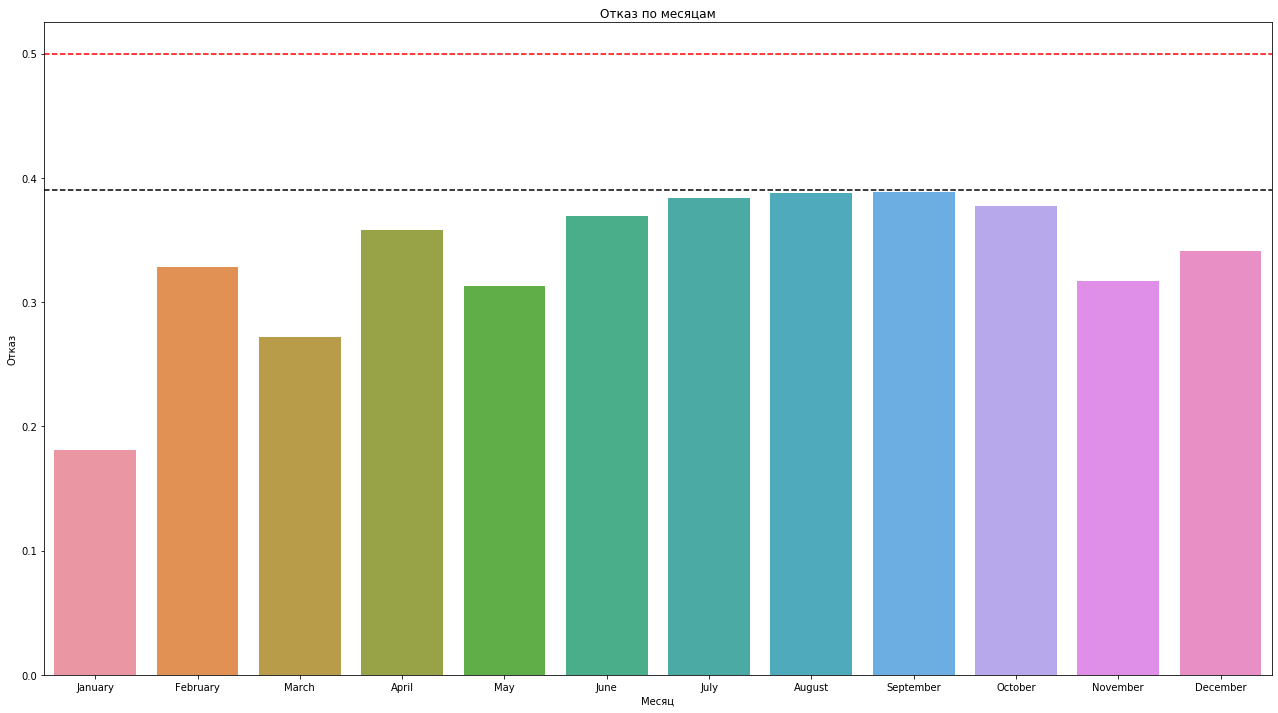

In [13]:
plt.figure(figsize=(22, 12))
ax = sns.barplot(data = month_figure);
ax.axhline(0.39, color="black", linestyle="--")
ax.axhline(0.5, color="red", linestyle="--")
plt.xlabel('Месяц');
plt.ylabel('Отказ');
plt.title('Отказ по месяцам');
plt.show()

In [14]:
# # строю столбчатую диаграмму, где отмечаю уровень 0.4 и 0.5
# ax = figure_one.plot(label=False, kind='bar', figsize=(10, 8), grid=True);
# ax.axhline(0.39, color="black", linestyle="--")
# ax.axhline(0.5, color="red", linestyle="--")
# plt.xlabel('Месяц');
# plt.ylabel('Отказ');
# plt.title('Отказ по месяцам');
# plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
 Из данного графика видем, что чаще всего отказываются от брони в Августе, Сентябре, Июле, Июне, Октябре, Апреле. Ниже представлен список тех стран, посетители из которых чаще откзываются от брони. Могу сказать, что некоторые страны могут быть представлены всего 1 раз(их я не удалял, а сделал группу)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

👍
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~На графике дублируются цвета: оранжевых и синих столбцов по 2 штуки. Для наглядности подпиши каждый месяц по горизонтальной оси, а не выноси их названия в легенду.~~
</div>



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за указание ошибки, исправил. Прошлый график закомментировал
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Хорошо! 
    
~~Только месяцы лучше отсортировать по порядку: January, February, March и т.п.~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Переделал :)
</div>

In [15]:
country = df_train.groupby('country')['is_canceled'].mean().sort_values()
country[country >= 0.5].index

Index(['KEN', 'PHL', 'TZA', 'MCO', 'CPV', 'PRT', 'SAU', 'GEO', 'NGA', 'ISL',
       'BGD', 'MDV', 'QAT', 'PAK', 'IDN', 'ARE', 'HND', 'GLP', 'GGY', 'UZB',
       'HKG', 'VGB', 'ZMB', 'JEY', 'MAC', 'TJK', 'BEN', 'AND', 'NIC', 'IMN',
       'KHM'],
      dtype='object', name='country')

In [16]:
lead_time = df_train.groupby('lead_time')['is_canceled'].mean()
pd.Series(lead_time[lead_time >=0.5].index).mean()

255.8125

In [17]:
# df_lead_time = pd.DataFrame([dict(df_train[df_train['lead_time'] > 255]['is_canceled'].value_counts(normalize=True)),
#                             dict(df_train[df_train['lead_time'] < 255]['is_canceled'].value_counts(normalize=True))], 
#                             index=['больше 255 дней', 'меньше 255 дней'])
# df_lead_time.columns =['Отменится', 'Заселится']
# df_lead_time.style.format({'Отменится': '{:.2%}', 'Заселится': '{:.2%}'})

In [18]:
print('Количество людей, которые сделали бронь более, чем за 255 суток равно:', 
      df_train[df_train['lead_time'] > 255].shape[0])

Количество людей, которые сделали бронь более, чем за 255 суток равно: 5728


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Получается, таких клиентов не так уж и мало – около 9%. 
</div>


In [19]:
reliable_more = df_train[(df_train['lead_time'] > 255) & (df_train['is_canceled'] == 0)]
reliable_less = df_train[(df_train['lead_time'] < 255) & (df_train['is_canceled'] == 0)]
unreliable_more = df_train[(df_train['lead_time'] > 255) & (df_train['is_canceled'] == 1)]
unreliable_less = df_train[(df_train['lead_time'] < 255) & (df_train['is_canceled'] == 1)]

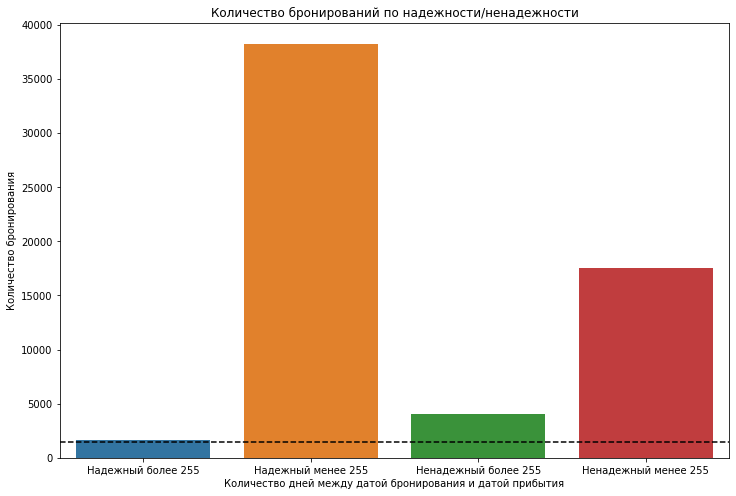

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=pd.DataFrame({'Надежный более 255': reliable_more['lead_time'].count(), 
                                    'Надежный менее 255': reliable_less['lead_time'].count(), 
                                    'Ненадежный более 255': unreliable_more['lead_time'].count(), 
                                    'Ненадежный менее 255': unreliable_less['lead_time'].count()}, index=[0]));
plt.xlabel('Количество дней между датой бронирования и датой прибытия');
plt.ylabel('Количество бронирования');
plt.title('Количество бронирований по надежности/ненадежности');
ax.axhline(1500, color="black", linestyle="--")
plt.show()

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Да, видно, что доля надежных и ненадежных клиентов с числом дней от бронирования до прибытия более 255 отличается.
</div>


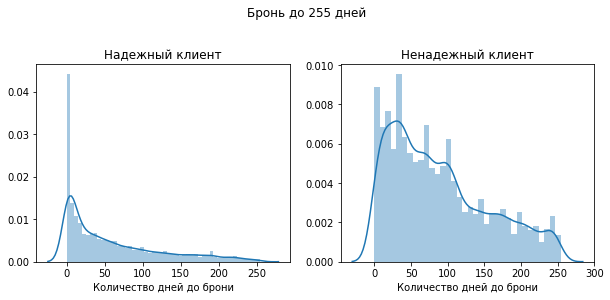

In [21]:
ax = plt.figure(figsize=(10, 8))
ax.suptitle('Бронь до 255 дней')
plt.subplot(2, 2, 1)
sns.distplot(reliable_less['lead_time'], kde=True)
plt.xlabel('Количество дней до брони')
plt.title('Надежный клиент')
plt.subplot(2, 2, 2)
sns.distplot(unreliable_less['lead_time'], kde=True)
plt.xlabel('Количество дней до брони')
plt.title('Ненадежный клиент')
plt.show()

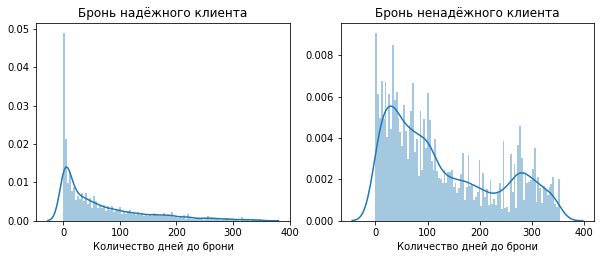

In [22]:
ax = plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.distplot(df_train[df_train['is_canceled'] == 0]['lead_time'], bins=100, kde=True)
plt.xlabel('Количество дней до брони')
plt.title('Бронь надёжного клиента')
plt.subplot(2, 2, 2)
sns.distplot(df_train[df_train['is_canceled'] == 1]['lead_time'], bins=100, kde=True)
plt.xlabel('Количество дней до брони')
plt.title('Бронь ненадёжного клиента')
plt.show()

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Отличные графики! Действительно, распределение для ненадежных клиентов имеет небольшой пик в районе 220-350 в отличие от распределения для надежных клиентов.  
</div>


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Ситуация интересная, у нас вообще недостаток данных, чтобы делать какие-либо выводы(в частности, за клиентов, который делают бронь более, чем за 255 вперед). Из графиков распределения видно, что отказы есть везде, а меньше отказов в первые 100 дней брони. Можно сказать, но не утверждать, что колиент, который бронирует день менее, чем 255 дней, то больше шанс, что отказа не будет, т.к. основное количество данных в этих подгруппах.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Да, интересная зависимость! 
</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~1) Проверь, сколько всего клиентов, которые бронируют номер более, чем за 255 суток? Если их мало, то делать по ним какие-либо выводы будет опрометчиво.  Если их достаточно, то с выводом все в порядке. ~~


~~2) Более наглядно было бы построить графики распределений признака lead_time в группе надежных (is_canceled=0) и в группе ненадежных (is_canceled=1) клиентов и сравнить их друг с другом.~~
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> В следущие разы буду намного пристальней смотреть на количество данных, очень благодарен за указание ошибки, спасибо :)
</div>

In [23]:
diwl = df_train.groupby('days_in_waiting_list')['is_canceled'].mean()
pd.Series(diwl[diwl >= 0.5].index).mean()

7.666666666666667

In [24]:
reliable_more_list = df_train[(df_train['days_in_waiting_list'] > 8) & (df_train['is_canceled'] == 0)]
reliable_less_list = df_train[(df_train['days_in_waiting_list'] < 8) & (df_train['is_canceled'] == 0)]
unreliable_more_list = df_train[(df_train['days_in_waiting_list'] > 8) & (df_train['is_canceled'] == 1)]
unreliable_less_list = df_train[(df_train['days_in_waiting_list'] < 8) & (df_train['is_canceled'] == 1)]

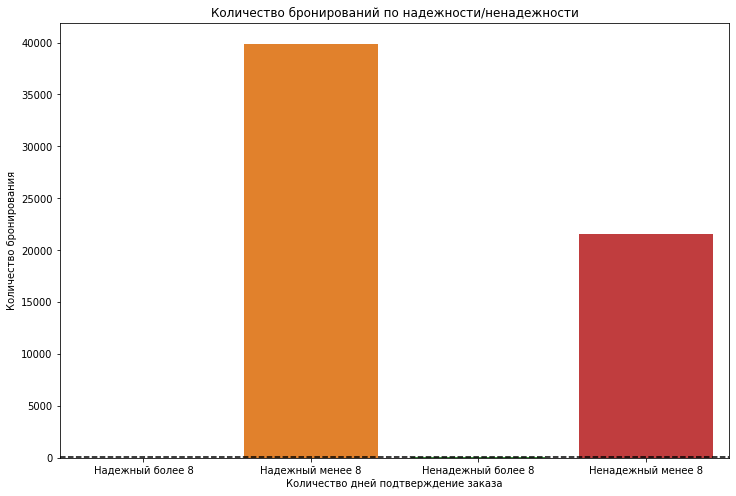

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=pd.DataFrame({'Надежный более 8': reliable_more_list['lead_time'].count(), 
                                    'Надежный менее 8': reliable_less_list['lead_time'].count(), 
                                    'Ненадежный более 8': unreliable_more_list['lead_time'].count(), 
                                    'Ненадежный менее 8': unreliable_less_list['lead_time'].count()}, index=[0]));
plt.xlabel('Количество дней подтверждение заказа');
plt.ylabel('Количество бронирования');
plt.title('Количество бронирований по надежности/ненадежности');
ax.axhline(100, color="black", linestyle="--")
plt.show()

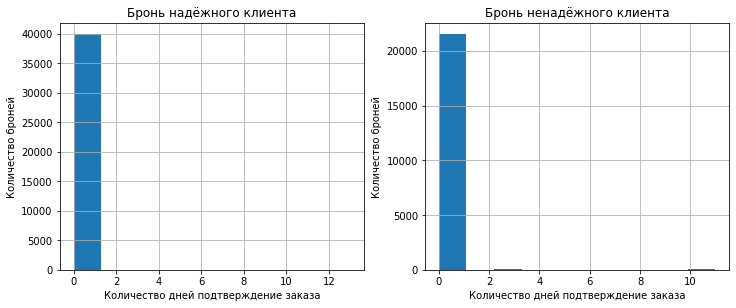

In [26]:
ax = plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
df_train[df_train['is_canceled'] == 0]['days_in_waiting_list'].hist()
plt.xlabel('Количество дней подтверждение заказа')
plt.ylabel('Количество броней')
plt.title('Бронь надёжного клиента')
plt.subplot(2, 2, 2)
df_train[df_train['is_canceled'] == 1]['days_in_waiting_list'].hist()
plt.xlabel('Количество дней подтверждение заказа')
plt.ylabel('Количество броней')
plt.title('Бронь ненадёжного клиента')
plt.show()

In [27]:
df_train[df_train['is_canceled'] == 1]['days_in_waiting_list'].shape[0]

21606

In [28]:
# diwl = pd.DataFrame([dict(df_train[df_train['days_in_waiting_list'] > 8]['is_canceled'].value_counts(normalize=True)),
#                             dict(df_train[df_train['days_in_waiting_list'] < 8]['is_canceled'].value_counts(normalize=True))], 
#                             index=['больше 8', 'меньше 8 дней'])
# diwl.columns =['Отменится', 'Заселится']
# diwl.style.format({'Отменится': '{:.2%}', 'Заселится': '{:.2%}'})

In [29]:
df_train[df_train['days_in_waiting_list'] == 0].shape[0]

61365

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Слишком мало данных для того, чтобы сделать выводы. А также весь столбец почти равен значению 0, следовательно, заказ подтверждался очень быстро.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Здесь аналогичное замечание:~~

~~Проверь, сколько всего клиентов, у которых заказ ждал подтверждение более 8 дней. ~~

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~Сравни графики распределений признака days_in_waiting_list в группе надежных и ненадежных клиентов. У какого процента выборки значение days_in_waiting_list равно 0? Как думаешь, нужен ли такой признак?~~

~~Есть ли еще признаки, которые принимают одно и то же значение более, чем на 95% выборки?~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    Исправил ошибку. Я считаю, что такой признак не даст нам ничего, т.к. там почти весь столбец в 1 значении.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Ок, хорошо.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    Есть столбцы, которые имеют одно и то же значениие более, чем 95 процентов выборки: arrival_date_year, children, babies, is_repeated_guest, previous_cancellations(93 процента), previous_bookings_not_canceled, required_car_parking_spaces. 
</div>

In [30]:
# pd.DataFrame(dict(df_train.corr().drop(df_train.corr().index[0], axis=1).iloc[0]), index=[0]).plot(
#     kind='bar', figsize=(12, 12), grid=True);
# plt.ylabel('Отказ');
# plt.title('Корелляция');

In [31]:
y = df_train.corr().drop(df_train.corr().index[0], axis=1).iloc[0].index
x = df_train.corr().drop(df_train.corr().index[0], axis=1).iloc[0]

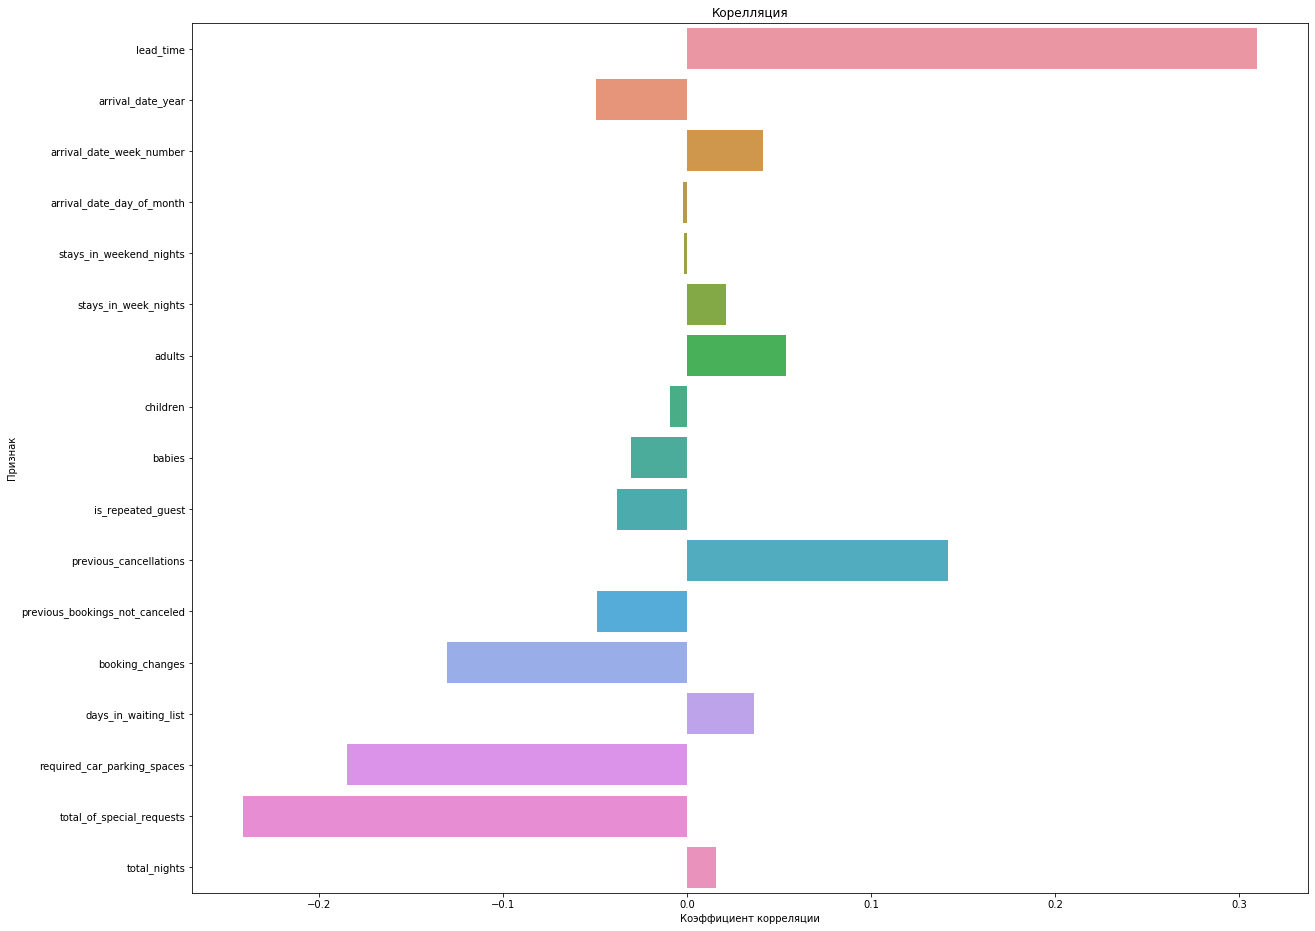

In [32]:
plt.figure(figsize=(20, 16))
sns.barplot(x=x, y=y);
plt.xlabel('Коэффициент корреляции');
plt.ylabel('Признак');
plt.title('Корелляция');

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Из данной корреляции могу сказать, что чем больше количество дней между датой бронирования и датой прибытия, тем больше шанс, что клиент откажется. Чем больше количество изменений параметров заказа, количество специальных отметок и мест для автомобилей, тем меньше шанс того, что клиент откажется.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Случайно удалил комментарии, ошибка заключалась в том, что нужно было добавить подписи по горизонтальной оси, а также убрать id_canceled, т.к. он равен 1. Всё исправил, прошлый график убрал в комментарий.
</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

👍
</div>


In [33]:
# просматриваю корреляции
df_train.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,1.000000,0.309809,-0.049724,0.041329,-0.002271,-0.001672,0.021092,0.053757,-0.009464,-0.030484,-0.038014,0.141910,-0.049115,-0.130376,0.036010,-0.184862,-0.241407,0.015566
lead_time,0.309809,1.000000,-0.040614,0.102331,-0.005920,0.076712,0.183648,0.135372,-0.048350,-0.022842,-0.087603,0.139882,-0.065688,-0.002468,-0.001707,-0.111138,-0.120507,0.179838
arrival_date_year,-0.049724,-0.040614,1.000000,-0.370128,0.013686,-0.006077,0.013114,0.043046,0.050590,-0.006870,-0.006584,-0.144493,0.040594,0.044178,0.020067,0.015387,0.092224,0.007233
arrival_date_week_number,0.041329,0.102331,-0.370128,1.000000,0.055408,0.028459,0.028066,-0.007280,-0.009174,0.005793,-0.015698,0.019874,-0.010679,0.009262,-0.035041,-0.011739,0.071396,0.035607
arrival_date_day_of_month,-0.002271,-0.005920,0.013686,0.055408,1.000000,0.006088,0.002435,0.016997,0.019605,0.002152,-0.008253,-0.033258,0.001699,0.024375,0.011537,0.006211,0.009910,0.004845
stays_in_weekend_nights,-0.001672,0.076712,-0.006077,0.028459,0.006088,1.000000,0.214168,0.115270,0.021522,0.021156,-0.087951,-0.006689,-0.028856,0.022253,-0.016273,-0.021869,0.074318,0.651705
stays_in_week_nights,0.021092,0.183648,0.013114,0.028066,0.002435,0.214168,1.000000,0.129618,0.024094,0.023803,-0.095366,0.001461,-0.048723,0.056092,0.029560,-0.028547,0.092828,0.880448
adults,0.053757,0.135372,0.043046,-0.007280,0.016997,0.115270,0.129618,1.000000,0.050996,0.027802,-0.167214,0.002172,-0.125533,-0.045158,-0.002071,0.009746,0.180165,0.156600
children,-0.009464,-0.048350,0.050590,-0.009174,0.019605,0.021522,0.024094,0.050996,1.000000,0.020550,-0.027361,-0.024771,-0.016065,0.051086,-0.009668,0.050550,0.104221,0.029156
babies,-0.030484,-0.022842,-0.006870,0.005793,0.002152,0.021156,0.023803,0.027802,0.020550,1.000000,-0.013448,-0.008980,-0.007029,0.087050,-0.003650,0.035961,0.115837,0.028752


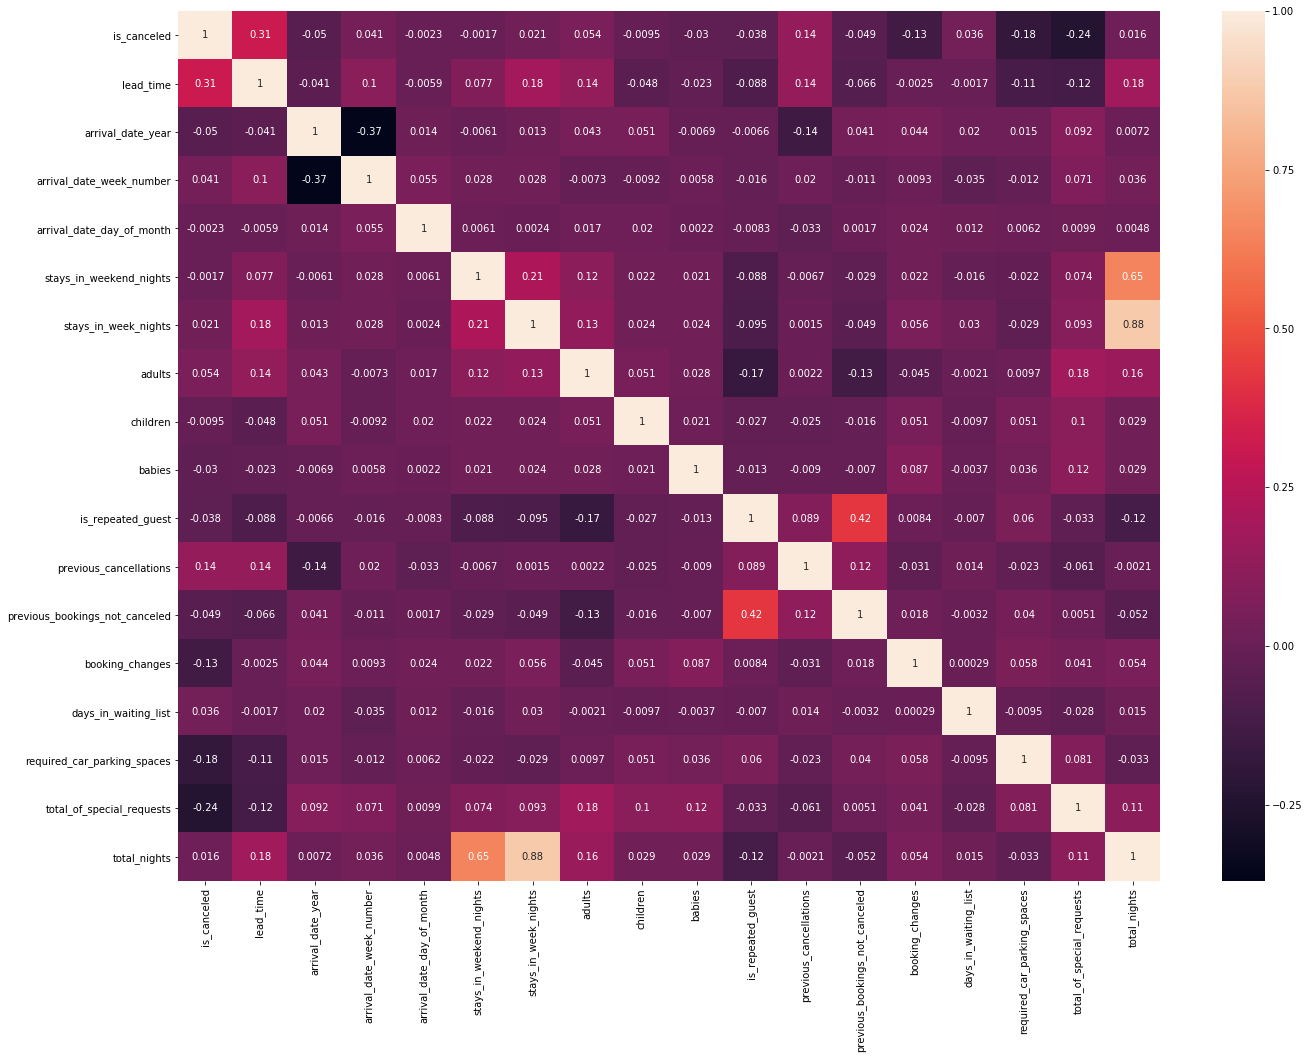

In [34]:
plt.figure(figsize=(22, 16))
sns.heatmap(df_train.corr(), annot=True);

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

~~Матрицу корреляций нагляднее отображать с помощью тепловой карты sns.heatmap(..., annot=..)~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за совет, действительно так лучше(сразу видно какие-либо высокие и низкие значения), учту в след. проектах :)
</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3 ✔️</b> 

Отлично!
</div>


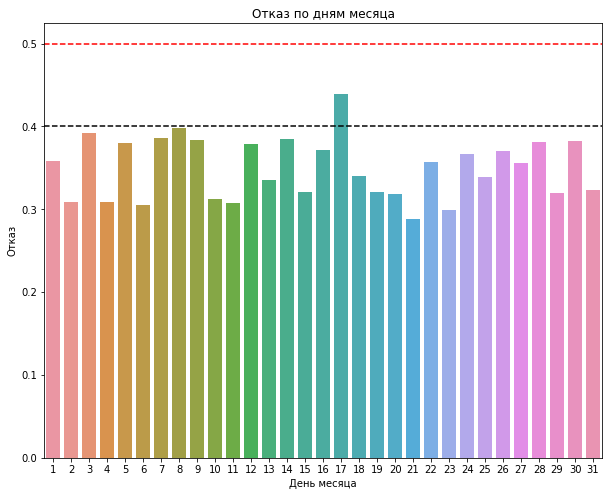

In [35]:
# строю столбчатую диаграмму с уровнем 0.4 и 0.5
month_day_figure = pd.DataFrame(dict(df_train.groupby('arrival_date_day_of_month')['is_canceled'].mean()), index = [0])
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=month_day_figure);
ax.axhline(0.4, color="black", linestyle="--")
ax.axhline(0.5, color="red", linestyle="--")
plt.xlabel('День месяца');
plt.ylabel('Отказ');
plt.title('Отказ по дням месяца');
plt.show()

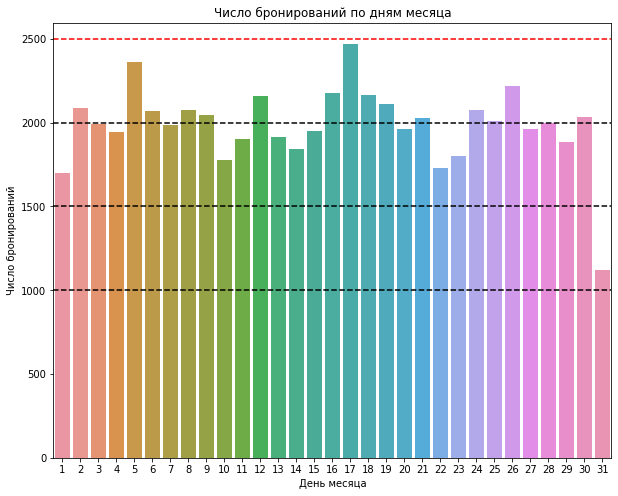

In [36]:
month_day_count = pd.DataFrame(dict(df_train.groupby('arrival_date_day_of_month')['is_canceled'].count()), index = [0])
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=month_day_count);
ax.axhline(1500, color="black", linestyle="--")
ax.axhline(2500, color="red", linestyle="--")
ax.axhline(2000, color="black", linestyle="--")
ax.axhline(1000, color="black", linestyle="--")
plt.xlabel('День месяца');
plt.ylabel('Число бронирований');
plt.title('Число бронирований по дням месяца');
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Из данных графиков могу сказать, что больше всего отказов происходит в середине месяца, а именно: в 17 день, а больше всего броней происходит на 6 день, 17 и 26.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

График отличный.
</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Хорошо бы дополнительно отобразить график с **числом** бронирований в каждый из дней, чтобы убедиться, что данных достаточно для построения выводов.~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за указание ошибки, исправил
</div>

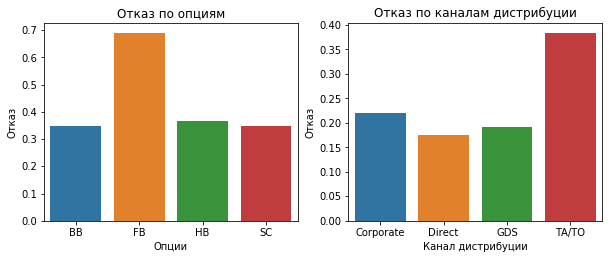

In [37]:
# строю диаграммы
dc_figure = pd.DataFrame(dict(df_train.groupby('distribution_channel')['is_canceled'].mean()), index = [0])
meal = pd.DataFrame(dict(df_train.groupby('meal')['is_canceled'].mean()), index = [0])
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=meal);
plt.xlabel('Опции');
plt.ylabel('Отказ');
plt.title('Отказ по опциям');
plt.subplot(2, 2, 2)
sns.barplot(data=dc_figure);
plt.xlabel('Канал дистрибуции');
plt.ylabel('Отказ');
plt.title('Отказ по каналам дистрибуции');
plt.show()

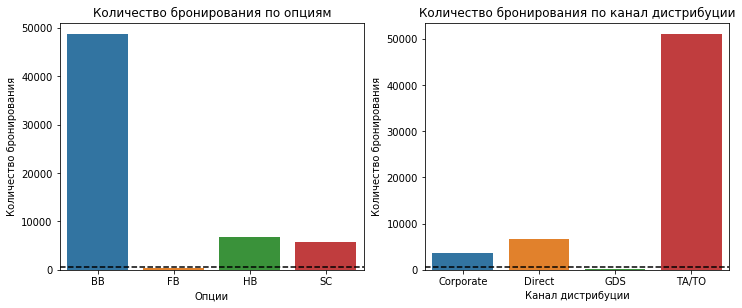

In [38]:
dc_count = pd.DataFrame(dict(df_train.groupby('distribution_channel')['is_canceled'].count()), index = [0])
meal_count = pd.DataFrame(dict(df_train.groupby('meal')['is_canceled'].count()), index = [0])
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(data=meal_count);
plt.xlabel('Опции');
plt.ylabel('Количество бронирования');
plt.title('Количество бронирования по опциям');
plt.subplot(2, 2, 2)
ax.axhline(500, color="black", linestyle="--")
ax = sns.barplot(data=dc_count);
plt.xlabel('Канал дистрибуции');
plt.ylabel('Количество бронирования');
plt.title('Количество бронирования по канал дистрибуции');
ax.axhline(500, color="black", linestyle="--")
plt.show()

In [39]:
display(dc_count)
meal_count

,Corporate,Direct,GDS,TA/TO
0,3721,6763,99,50930


,BB,FB,HB,SC
0,48615,450,6725,5723


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Данных мало, чтобы делать какие-то выводы. Можно сказать, что в канале дистрибуции TA/TO шанс, что человек отменит заказ - 38,4 процента, шанс того, что с опцией BB человек отменит заказ - 34,6 процента.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Графики в порядке.
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~И здесь построй дополнительно графики с **числом** заказов для каждого значения meal и distribution_channel. Достаточно ли у нас данных для каждой категории?~~
    
~~Для признака arrival_date_week_number замечание аналогичное.~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за указание ошибки, исправил. Действительно, у нас довольно таки мало данных, чтобы судить о том, в какой категории клиент больше склонен к отказу от брони.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Да, в основном, клиенты выбирают опцию BB и имеют канал дистрибуции TA/TO.
    

</div>


In [40]:
df_train.groupby('previous_cancellations')['is_canceled'].mean().sort_values(ascending=False)

previous_cancellations
26    1.000000
25    1.000000
24    1.000000
21    1.000000
19    1.000000
14    1.000000
6     1.000000
1     0.969588
2     0.415094
0     0.302066
3     0.270833
4     0.200000
5     0.153846
11    0.074074
13    0.000000
Name: is_canceled, dtype: float64

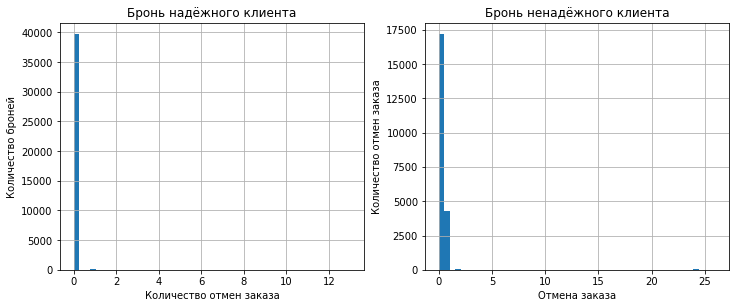

In [41]:
ax = plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
df_train[df_train['is_canceled'] == 0]['previous_cancellations'].hist(bins=50)
plt.xlabel('Количество отмен заказа')
plt.ylabel('Количество броней')
plt.title('Бронь надёжного клиента')
plt.subplot(2, 2, 2)
df_train[df_train['is_canceled'] == 1]['previous_cancellations'].hist(bins=50)
plt.xlabel('Отмена заказа')
plt.ylabel('Количество отмен заказа')
plt.title('Бронь ненадёжного клиента')
plt.show()

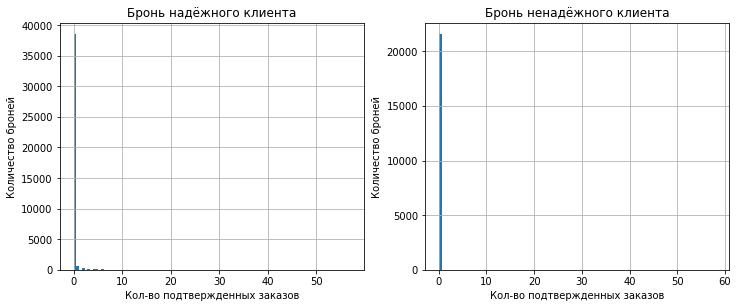

In [42]:
ax = plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
df_train[df_train['is_canceled'] == 0]['previous_bookings_not_canceled'].hist(bins=100)
plt.xlabel('Кол-во подтвержденных заказов')
plt.ylabel('Количество броней')
plt.title('Бронь надёжного клиента')
plt.subplot(2, 2, 2)
df_train[df_train['is_canceled'] == 1]['previous_bookings_not_canceled'].hist(bins=100)
plt.xlabel('Кол-во подтвержденных заказов')
plt.ylabel('Количество броней')
plt.title('Бронь ненадёжного клиента')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Очень много данных, где человек имеет 0 подтвержденных броней и 0 отказов, в итоге сложно что-то говорить. Если у человека есть 1 отмененный заказ, то больше шансов, что он отменит, чем если бы у него не было отмененного ранее заказа. В случае подтвержденного заказа не влияет есть подтвержденные заказы или нет, т.к. у обоих групп 0 является основным значением.

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~А сколько записей с тем или иным значением признака previous_cancellations/previous_bookings_not_canceled? Насколько обоснованными получились выводы?~~
    
~~Как и для остальных признаков, здесь предпочтительно построить графики распределений в группах надежных и ненадежных клиентов и сравнить их друг с другом.~~
</div>



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил, данных мало.
</div>

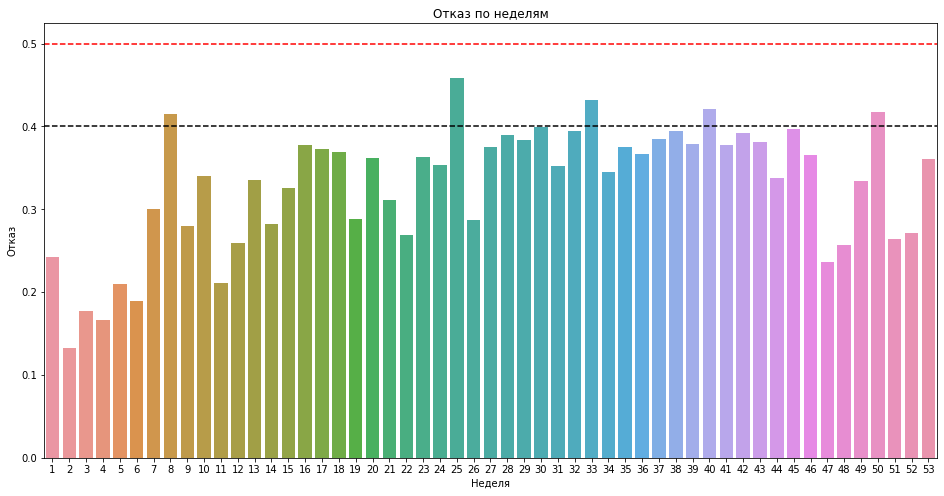

In [43]:
adwn_figure = pd.DataFrame(dict(df_train.groupby('arrival_date_week_number')['is_canceled'].mean()), index = [0])
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=adwn_figure);
ax.axhline(0.4, color="black", linestyle="--")
ax.axhline(0.5, color="red", linestyle="--")
plt.xlabel('Неделя');
plt.ylabel('Отказ');
plt.title('Отказ по неделям');
plt.show()

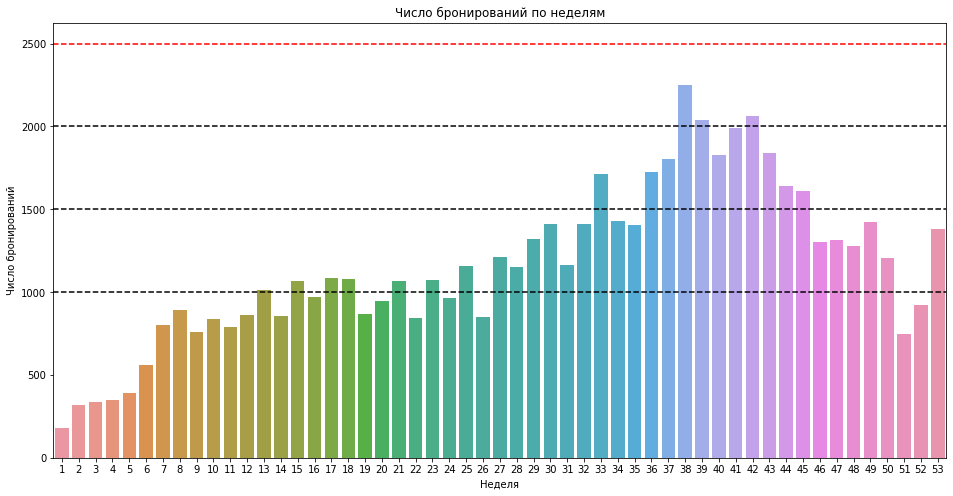

In [44]:
adwn_count = pd.DataFrame(dict(df_train.groupby('arrival_date_week_number')['is_canceled'].count()), index = [0])
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=adwn_count);
ax.axhline(1500, color="black", linestyle="--")
ax.axhline(2500, color="red", linestyle="--")
ax.axhline(2000, color="black", linestyle="--")
ax.axhline(1000, color="black", linestyle="--")
plt.xlabel('Неделя');
plt.ylabel('Число бронирований');
plt.title('Число бронирований по неделям');
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Из графиков могу сказать, что наплыв бронирований был ближе к концу года, а также могу сказать, что в 25 неделю было больше всего отказов. На счёт типа заказчика - у нас недостаточно данных для каких-либо выводов. В типе заказчика Transient шанс того, что заказ будет отменен 37 процентов.

In [45]:
df_train.groupby('customer_type')['is_canceled'].mean()

customer_type
Contract           0.374858
Group              0.068100
Transient          0.369917
Transient-Party    0.298617
Name: is_canceled, dtype: float64

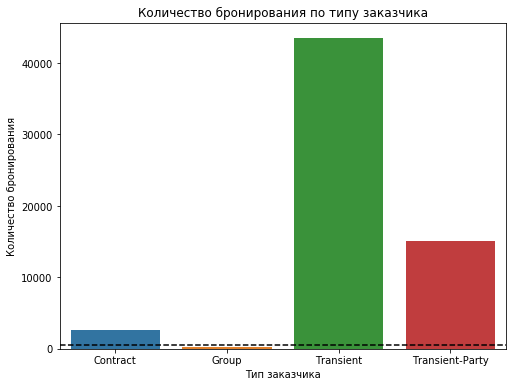

In [46]:
customer_type_count = pd.DataFrame(dict(df_train.groupby('customer_type')['is_canceled'].count()), index = [0])
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=customer_type_count);
plt.xlabel('Тип заказчика');
plt.ylabel('Количество бронирования');
plt.title('Количество бронирования по типу заказчика');
ax.axhline(500, color="black", linestyle="--")
plt.show()

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~Дополнительно посчитай, сколько всего записей с каждым значением customer_type.~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Тут ситуация такая же, как и выше :) По одному типу у нас больше 40 тысяч данных, по некоторым меньше 500. Судить по этим данным нельзя.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Точнее, выводы можно сделать только по типам заказчика Transient и Transient-Party. Доля отмен бронирований для типа Transient (37%) чуть больше, чем для Transient-Party (30%).
</div>



In [47]:
# пишу функцию для добавления числового столбца с месяцами
def replace_month(df):
    number = 0
    if df.loc['arrival_date_month'] == 'January':
        number = 1
    if df.loc['arrival_date_month'] == 'February':
        number = 2
    if df.loc['arrival_date_month'] == 'March':
        number = 3
    if df.loc['arrival_date_month'] == 'April':
        number = 4
    if df.loc['arrival_date_month'] == 'May':
        number = 5
    if df.loc['arrival_date_month'] == 'June':
        number = 6
    if df.loc['arrival_date_month'] == 'July':
        number = 7
    if df.loc['arrival_date_month'] == 'August':
        number = 8
    if df.loc['arrival_date_month'] == 'September':
        number = 9
    if df.loc['arrival_date_month'] == 'October':
        number = 10
    if df.loc['arrival_date_month'] == 'November':
        number = 11
    if df.loc['arrival_date_month'] == 'December':
        number = 12
    return number

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Альтернативный вариант – для порядкового кодирования использовать OrdinalEncoder.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Согласен, так было бы лучше :) Учту 
</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3 ✔️</b> 

Поправлюсь: на самом деле, в этом случае твой способ кодирования предпочтительнее, так как при использовании Ordinal Encoder признаки могут оказаться закодированными в произвольном порядке, например: January как 5, February как 3 и т.п. 
</div>


In [48]:
# создаю индексы стран, которые встречались очень много раз
country_index_top = df_train['country'].value_counts().head(16).index

In [49]:
# пишу функцию, которая заменит страны, которые встретились очень мало раз, на единую группу
def replace_country(df):
    if df['country'] not in country_index_top:
        return 'OTHER'
    else:
        return df['country']
    
df_train['country'] = df_train.apply(replace_country, axis=1)
df_test['country'] = df_test.apply(replace_country, axis=1)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Да, в выборках было много стран с малым числом записей.
</div>


In [50]:
df_train['arrival_date_month_new'] = df_train.apply(replace_month, axis=1)
df_test['arrival_date_month_new'] = df_test.apply(replace_month, axis=1)

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~Добавь промежуточный вывод: что было сделано в этом разделе?~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Добавил
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Промежуточный вывод<a class="tocSkip"> </h2>
Был проведен исследовательский анализ данных, с помощью которого было выявлено, что чаще всего отказываются от брони в Августе, Сентябре, Июле, Июне, Октябре, Апреле; меньше отказов в первые 100 дней брони; чем больше количество дней между датой бронирования и датой прибытия, тем больше шанс, что клиент откажется, чем больше количество изменений параметров заказа, количество специальных отметок и мест для автомобилей, тем меньше шанс того, что клиент откажется; больше всего отказов происходит в середине месяца, а именно: в 17 день, а больше всего броней происходит на 6 день, 17 и 26; если у человека есть 1 отмененный заказ, то больше шансов, что он отменит, чем если бы у него не было отмененного ранее заказа; наплыв бронирований был ближе к концу года, а также могу сказать, что в 25 неделю было больше всего отказов; в типе заказчика Transient шанс того, что заказ будет отменен 37 процентов. Для удобства работы с данными были написаны функции, также было построено довольно таки много графиков, с помощью которых была облегчено понимание некоторых сравнений и т.д. Были удалены выбросы и найдены столбцы, которые не будут нужны для обучения модели.

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

In [51]:
winter = ['December', 'January', 'February']
spring = ['March', 'April', 'May']
autumn = ['September', 'October', 'November']
summer = ['June', 'July', 'August']
# функция для добавления столбца с сезоном
def column_season(df):
    if df['arrival_date_month'] in winter:
        return 'winter'
    if df['arrival_date_month'] in summer:
        return 'summer'
    if df['arrival_date_month'] in autumn:
        return 'autumn'
    if df['arrival_date_month'] in spring:
        return 'spring'
# функция для добавления столбца со след. месяцем
def next_month(df):
    if df['arrival_date_month_new'] == 12:
        return 1
    else:
        return df['arrival_date_month_new'] + 1
# функция для добавления столбца с процентом повышения цен в сезон   
def season_percent(df):
    if df['season'] == 'winter':
        return 0
    if df['season'] == 'spring' or df['season'] == 'autumn':
        return 0.2
    if df['season'] == 'summer':
        return 0.4

winter_number = [12, 1, 2]
spring_number = [3, 4, 5]
autumn_number = [9, 10, 11]
summer_number = [6, 7 ,8]    
    
# функция для добавления столбца с сезоном для след. месяца
def season_percent_next_month(df):
    if df['next_month'] in winter_number:
        return 0
    if df['next_month'] in spring_number or df['next_month'] in autumn_number:
        return 0.2
    if df['next_month'] in summer_number:
        return 0.4
    
month_31 = [1, 3, 5, 7, 8, 10, 12]
month_30 = [4, 6, 9, 11]
# функция для добавления столбца со след. месяцем  
def next_month_day(df):
    count = 0
    season = df['season']
    month = df['arrival_date_month_new']
    nights = df['total_nights']
    day = df['arrival_date_day_of_month']
    number = day + nights
    year = df['arrival_date_year']
    
    if year == 2015:
        if month == 2 and number > 28:
                return number - 29
        if month == 2 and number <= 28:
            return 0
    if year == 2016:
        if month == 2 and number > 29:
                return number - 30
        if month == 2 and number <= 29:
            return 0
    if year == 2017:
        if month == 2 and number > 28:
                return number - 29
        if month == 2 and number <= 28:
            return 0
    if number > 31 and month in month_31:
            return number - 32
    if number <= 31 and month in month_31:
            return 0
    if number > 30 and month in month_30:
            return number - 31
    if number <= 30 and month in month_30:
            return 0

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Здорово, что учитываешь изменение тарифа при смене сезона 👍👍👍
</div>


In [52]:
# константы
PRICE_A = 1000
PRICE_B = 800
PRICE_C = 600
PRICE_D = 550
PRICE_E = 500
PRICE_F = 450
PRICE_G = 350
PRICE_CLEANING_A = 400
PRICE_CLEANING_B = 350
PRICE_CLEANING_C = 350
PRICE_CLEANING_D = 150
PRICE_CLEANING_E = 150
PRICE_CLEANING_F = 150
PRICE_CLEANING_G = 150

In [53]:
# # функция для подсчета прибыли
# def season_profit(df):
#     profit = 0
#     nights_all = df['total_nights']
#     room = df['reserved_room_type']
#     percent = df['percent']
#     next_nights = df['next_month_day']
#     next_month = df['next_month']
#     percent_next = df['percent_next_month']
#     nights_now = abs(nights_all - next_nights)
#     if nights_all == 1:
#         if df['is_canceled'] == 0:
#             if room == 'A':
#                 profit += PRICE_A + PRICE_A * percent - PRICE_CLEANING_A
#             if room == 'B':
#                 profit += PRICE_B + PRICE_B * percent - PRICE_CLEANING_B
#             if room == 'C':
#                 profit += PRICE_C + PRICE_C * percent - PRICE_CLEANING_C
#             if room == 'D':
#                 profit += PRICE_D + PRICE_D * percent - PRICE_CLEANING_D
#             if room == 'E':
#                 profit += PRICE_E + PRICE_E * percent - PRICE_CLEANING_E
#             if room == 'F':
#                 profit += PRICE_F + PRICE_F * percent - PRICE_CLEANING_F
#             if room == 'G':
#                 profit += PRICE_G + PRICE_G * percent - PRICE_CLEANING_G
    
    
#     if nights_all > 1:
#         if df['is_canceled'] == 0:
#             if room == 'A':
#                 profit += ((PRICE_A + PRICE_A * percent) * nights_now 
#                            + (PRICE_A + PRICE_A * percent_next) * next_nights 
#                            - PRICE_CLEANING_A * np.ceil((nights_all / 2)))
#             if room == 'B':
#                 profit += ((PRICE_B + PRICE_B * percent) * nights_now 
#                            + (PRICE_B + PRICE_B * percent_next) * next_nights 
#                            - PRICE_CLEANING_B * np.ceil((nights_all / 2)))
#             if room == 'C':
#                 profit += ((PRICE_C + PRICE_C * percent) * nights_now 
#                            + (PRICE_C + PRICE_C * percent_next) * next_nights 
#                            - PRICE_CLEANING_C * np.ceil((nights_all / 2)))
#             if room == 'D':
#                 profit += ((PRICE_D + PRICE_D * percent) * nights_now 
#                            + (PRICE_D + PRICE_D * percent_next) * next_nights 
#                            - PRICE_CLEANING_D * np.ceil((nights_all / 2)))
#             if room == 'E':
#                 profit += ((PRICE_E + PRICE_E * percent) * nights_now 
#                            + (PRICE_E + PRICE_E * percent_next) * next_nights 
#                            - PRICE_CLEANING_E * np.ceil((nights_all / 2)))
#             if room == 'F':
#                 profit += ((PRICE_F + PRICE_F * percent) * nights_now 
#                            + (PRICE_F + PRICE_F * percent_next) * next_nights 
#                            - PRICE_CLEANING_F * np.ceil((nights_all / 2)))
#             if room == 'G':
#                 profit += ((PRICE_G + PRICE_G * percent) * nights_now 
#                            + (PRICE_G + PRICE_G * percent_next) * next_nights 
#                            - PRICE_CLEANING_G * np.ceil((nights_all / 2)))
                
#     if df['is_canceled'] == 1:
#         if room == 'A':
#             profit -= PRICE_CLEANING_A
#         if room == 'B':
#             profit -= PRICE_CLEANING_B
#         if room == 'C':
#             profit -= PRICE_CLEANING_C
#         if room == 'D':
#             profit -= PRICE_CLEANING_D
#         if room == 'E':
#             profit -= PRICE_CLEANING_E
#         if room == 'F':
#             profit -= PRICE_CLEANING_F
#         if room == 'G':
#             profit -= PRICE_CLEANING_G
        
#     return profit

In [54]:
def season_profit(df):
    profit = 0
    nights_all = df['total_nights']
    room = df['reserved_room_type']
    percent = df['percent']
    next_nights = df['next_month_day']
    next_month = df['next_month']
    percent_next = df['percent_next_month']
    nights_now = abs(nights_all - next_nights)
    
    if room == 'A':
        price = PRICE_A
        price_cleaning = PRICE_CLEANING_A
    elif room == 'B':
        price = PRICE_B
        price_cleaning = PRICE_CLEANING_B
    elif room == 'C':
        price = PRICE_C
        price_cleaning = PRICE_CLEANING_C
    elif room == 'D':
        price = PRICE_D
        price_cleaning = PRICE_CLEANING_D
    elif room == 'E':
        price = PRICE_E
        price_cleaning = PRICE_CLEANING_E
    elif room == 'F':
        price = PRICE_F
        price_cleaning = PRICE_CLEANING_F
    else:
        price = PRICE_G
        price_cleaning = PRICE_CLEANING_G
        
    
    if nights_all == 1:
        if df['is_canceled'] == 0:
            profit += price + price * percent - price_cleaning
    
    if nights_all > 1:
        if df['is_canceled'] == 0:
            profit += ((price + price * percent) * nights_now 
                           + (price + price * percent_next) * next_nights 
                           - price_cleaning * np.ceil((nights_all / 2)))
            
                
    if df['is_canceled'] == 1:
        profit -= price_cleaning
        
    return profit

In [55]:
df_test['season'] = df_test.apply(column_season, axis=1)
df_train['season'] = df_train.apply(column_season, axis=1)

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Я сделал очень много новых столбцов, с помощью которых буду вычислять прибыль. Некоторые столбцы для того, чтобы посчитать прибыль 1 заказа за 2 месяца, есть такие заказы, когда человек забронировал номер на конец месяца и на несколько дней, выходит, что дни переходят на след. месяц и цена, возможно, будет выше. Столбцы сделаны именно для этого  

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Проверь, сколько раз проводят уборку в случае нечетного числа ночей. Обрати внимание на фунцию np.ceil(..), она может пригодиться :)~~
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

В остальном, все корректно! 
    
Альтернативный способ – сначала добавить нужные столбцы в датасет: 
    
1) создать две таблицы: в одной – значения сезонных коэффициентов в разные месяцы, в другой – стоимости номеров и значения затрат на разовое обслуживание для разных категорий номеров;
    
2) присоединить (merge) эти таблицы к исходному датасету.

После этого подсчет прибыли для всех строк датасета будет проводится по одной и той же формуле, многочисленные if-ы не будут нужны.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил ситуацию с нечетным числом ночей, забыл про то, что убирают в 1 день из 2, из-за этого и получается, что за 3 дня убираются 2 раза. Спасибо за выявление ошибки, а также за альтернативный способ :)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

~~Схема расчета прибыли для разных типов номеров одна и та же, поэтому можно было упростить код:~~
    
    # функция для подсчета прибыли
    def season_profit(df):
        profit = 0
        ...
        nights_now = abs(nights_all - next_nights)
    
        # инициализация переменных price и price_cleaning
        if room == 'A':
            price = PRICE_A
            price_cleaning = PRICE_CLEANING_A
        elif room == 'B':
            price = PRICE_B
            price_cleaning = PRICE_CLEANING_B
        ...
        else:
            price = PRICE_G
            price_cleaning = PRICE_CLEANING_G
        
        # теперь можно рассчитать прибыль
        if nights_all == 1:
            if df['is_canceled'] == 0:
                profit += price + price * percent - price_cleaning

        if nights_all > 1:
            if df['is_canceled'] == 0:
                profit += ((price + price * percent) * nights_now 
                               + (price + price * percent_next) * next_nights 
                               - price_cleaning * np.ceil((nights_all / 2)))
 

        if df['is_canceled'] == 1:
            profit -= price_cleaning

        return profit
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за совет, так намного лучше :)
</div>

In [56]:
df_train_profit = df_train[['season', 
                  'arrival_date_month_new', 
                  'arrival_date_day_of_month', 
                  'total_nights', 
                  'reserved_room_type', 
                  'is_canceled', 
                  'arrival_date_year']]

In [57]:
# функция для создания новых столбцов
def processing_data(df):
    df['next_month_day'] = df.apply(next_month_day, axis=1)
    df['next_month'] = df.apply(next_month, axis=1)
    df['percent'] = df.apply(season_percent, axis=1)
    df['percent_next_month'] = df.apply(season_percent_next_month, axis=1)
    
    
    return df

In [58]:
df_train_profit.query('season == "summer" & arrival_date_year == 2016')

,season,arrival_date_month_new,arrival_date_day_of_month,total_nights,reserved_room_type,is_canceled,arrival_date_year
4152,summer,6,1,3,A,1,2016
4153,summer,6,1,3,A,1,2016
4154,summer,6,1,3,A,1,2016
4155,summer,6,1,3,A,1,2016
4156,summer,6,1,3,A,1,2016
...,...,...,...,...,...,...,...
58408,summer,8,29,7,D,0,2016
58409,summer,8,31,5,A,0,2016
58448,summer,8,30,7,A,0,2016
58462,summer,8,30,8,A,0,2016


In [59]:
# считаю прибыль по месяцам
warnings.filterwarnings('ignore')
df_summer = df_train_profit.query('season == "summer" & arrival_date_year == 2016')
df_winter = df_train_profit.query('season == "winter" & arrival_date_year == 2016')
df_spring = df_train_profit.query('season == "spring" & arrival_date_year == 2016')
df_autumn = df_train_profit.query('season == "autumn" & arrival_date_year == 2016')

df_summer = processing_data(df_summer)
df_winter = processing_data(df_winter)
df_spring = processing_data(df_spring)
df_autumn = processing_data(df_autumn)

PROFIT_SUMMER = df_summer.apply(season_profit, axis=1).sum()
PROFIT_WINTER = df_winter.apply(season_profit, axis=1).sum()
PROFIT_SPRING = df_spring.apply(season_profit, axis=1).sum()
PROFIT_AUTUMN = df_autumn.apply(season_profit, axis=1).sum()

PROFIT_NOT_DEPOSIT = PROFIT_SUMMER + PROFIT_WINTER + PROFIT_SPRING + PROFIT_AUTUMN

In [60]:
PROFIT_NOT_DEPOSIT

69891570.0

In [61]:
print('Количество бронирований за лето -', df_summer.shape[0])
print('Количество бронирований за зиму -', df_winter.shape[0])
print('Количество бронирований за весну -', df_spring.shape[0])
print('Количество бронирований за осень -', df_autumn.shape[0])

Количество бронирований за лето - 11128
Количество бронирований за зиму - 7925
Количество бронирований за весну - 12539
Количество бронирований за осень - 12563


In [62]:
# создаю датафрейм с прибылью по каждому сезону
profit_season = pd.DataFrame({'winter': PROFIT_WINTER,
                              'summer': PROFIT_SUMMER, 
                              'spring':PROFIT_SPRING, 
                              'autumn': PROFIT_AUTUMN},
                              index=[0])

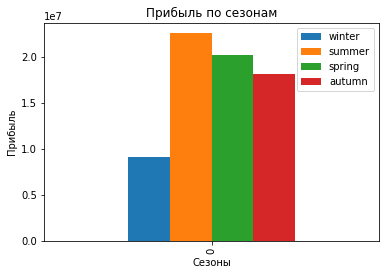

In [63]:
# создаю диаграмму 
profit_season.plot(kind='bar');
plt.xlabel('Сезоны');
plt.ylabel('Прибыль');
plt.title('Прибыль по сезонам');

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~Проверь, в обучающей выборке представлены данные с **июля** 2015 по декабрь 2016 года. Поэтому низкая суммарная прибыль за зиму и весну может быть связана именно с тем, что данных за первую половину 2015 года в выборке нет.~~
</div>



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил, смотрел по 2016 году, т.к. там намного больше данных.
</div>

In [64]:
df_train[df_train['arrival_date_year'] == 2016]['arrival_date_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [65]:
df_not_deposit_test = df_test[['season', 
                  'arrival_date_month_new', 
                  'arrival_date_day_of_month', 
                  'total_nights', 
                  'reserved_room_type', 
                  'is_canceled', 
                  'arrival_date_year']]

In [66]:
df_not_deposit_test = processing_data(df_not_deposit_test)
PROFIT_NOT_DEPOSIT_TEST = df_not_deposit_test.apply(season_profit, axis=1).sum()

In [67]:
PROFIT_NOT_DEPOSIT_TEST

48812600.0

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Прибыль рассчитана корректно.
</div>


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
За 1 год прибыль составила 69.891.570, а за 1 год(тестовой выборки) 48.812.600, самым прибыльным сезоном вышло лето.

### Шаг 4. Разработка модели ML

In [68]:
# # разбиваю выборки
# features = df_train.drop(columns=['is_canceled', 'arrival_date_month', 'season'], axis=0)
# target = df_train['is_canceled']

# features_train, features_test, target_train, target_test = train_test_split(
#     features, target, test_size=0.25, random_state=12345, stratify=target)

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Делить обучающую выборку на части не нужно, так как в задании на обучающей выборке требуется провести кросс-валидацию.~~
    
~~Тестовая выборка дана в условии.~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за исправление :) Исправил
</div>

In [69]:
# просматриваю размеры выборок
# features_train.shape[0], features_test.shape[0]

In [70]:
df_test['merge'] = 1

In [71]:
data = df_train.merge(df_test, how='outer')
data['merge'] = data['merge'].fillna(0)
data.drop(columns=['days_in_waiting_list', 
                       'arrival_date_year', 
                       'children', 
                       'babies', 
                       'is_repeated_guest', 
                       'previous_cancellations', 
                       'previous_bookings_not_canceled', 
                       'required_car_parking_spaces'], inplace=True)

df_train.drop(columns=['days_in_waiting_list', 
                       'arrival_date_year', 
                       'children', 
                       'babies', 
                       'is_repeated_guest', 
                       'previous_cancellations', 
                       'previous_bookings_not_canceled', 
                       'required_car_parking_spaces'], inplace=True)

In [72]:
# df_train.drop(columns=['days_in_waiting_list', 
#                        'arrival_date_year', 
#                        'children', 
#                        'babies', 
#                        'is_repeated_guest', 
#                        'previous_cancellations', 
#                        'previous_bookings_not_canceled', 
#                        'required_car_parking_spaces'], inplace=True)
# df_test.drop(columns=['days_in_waiting_list', 
#                        'arrival_date_year', 
#                        'children', 
#                       'babies', 
#                        'is_repeated_guest', 
#                        'previous_cancellations', 
#                        'previous_bookings_not_canceled', 
#                        'required_car_parking_spaces'], inplace=True)

In [73]:
# пишу функцию, которая произведет стандартизацию и onehotencoder
warnings.filterwarnings('ignore')
numeric = ['lead_time',  
           'arrival_date_month_new',
           'arrival_date_week_number',
           'arrival_date_day_of_month',
           'stays_in_weekend_nights',
           'stays_in_week_nights',
           'adults',
           'booking_changes',
           'total_of_special_requests',
           'total_nights']

scaler = StandardScaler()
standard = scaler.fit(df_train[numeric])

# def predprocess(df, standard):
#     df[numeric] = standard.transform(df[numeric])
#     df = pd.get_dummies(df, drop_first=True, columns=['meal', 
#                                                              'country',
#                                                              'distribution_channel', 
#                                                              'reserved_room_type', 
#                                                              'customer_type'])
#     return df

data[numeric] = standard.transform(data[numeric])
data = pd.get_dummies(data, drop_first=True, columns=['meal', 
                                                  'country',
                                                  'distribution_channel', 
                                                  'reserved_room_type', 
                                                  'customer_type'])

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

OHE-кодирование проведено верно.
</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2 ❌</b> 

~~При масштабировании scaler следует настраивать (fit) только по обучающей выборке, см. спринт 6 Обучение с учителем -> Подготовка признаков -> Масштабирование признаков.~~

</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Увидел, исправил, учёл ошибку
</div>

In [74]:
df_test_new = data[data['merge'] == 1]
df_train_new = data[data['merge'] == 0]
df_test_new.drop(columns = ['merge'], inplace=True)
df_train_new.drop(columns = ['merge'], inplace=True)

In [75]:
features_train = df_train_new.drop(columns=['is_canceled', 'season', 'arrival_date_month'], axis=0)
features_test = df_test_new.drop(columns=['is_canceled', 'season', 'arrival_date_month'], axis=0)
target_train = df_train_new['is_canceled']
target_test = df_test_new['is_canceled']

In [76]:
# df_train_new = predprocess(features_train, standard)
# features_test_new = predprocess(features_test, standard)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

~~Масштабирование проведено правильно.~~
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Для OHE-кодирования вызывать два раза pd.get_dummies(..) для каждой из выборок неверно: проверь, в тестовой и обучающей выборках после этого могут оказаться разные столбцы. ~~
    
~~Чтобы этого не произошло, воспользуйся одним из способов:~~
~~1) объедини обучающую и тестовую выборки, проведи OHE-кодирование объединенной выборки с помощью pd.get_dummies, раздели полученную выборку на обучающую и тестовую;~~
    
~~2) используй OneHotEncoder(handle_unknown=…): сначала настрой (fit) его на обучающей выборке, а затем преобразуй обучающую и тестовую выборки. ~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Понял свою ошибку, исправил. Я также могу с помощью train_test_split разбить целую выборку, верно же?
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Нет, так как тестовая выборка уже была дана в условии, ее не надо менять, поэтому случайное разбиение с помощью train_test_split не подойдет.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Отлично
</div>

In [77]:
# функция для того, чтобы избавиться от дисбаланса
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [78]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 2)


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~Поясни, пожалуйста, почему ты задаешь repeat=2? Это правильно, просто не хватает пояснений.~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
repeat 2 из-за того, что в таргете 0 больше, чем 1 в 2 раза. Следовательно, нам нужно увеличить количество 1 до такого же количества 0.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Ок, хорошо.
</div>



In [79]:
# было
target_train.value_counts()

0    39907
1    21606
Name: is_canceled, dtype: int64

In [80]:
# стало
target_upsampled.value_counts()

1    43212
0    39907
Name: is_canceled, dtype: int64

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Укажи, какую метрику качества ты выбрал и почему.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Выбрал метрику f1_score, т.к. она считает не просто процент правильных ответов, а считает полноту и точность, т.е. доля положительных ответов относительно всех ответов, а также как много отрицательных ответов нашла модель, пока искала положительные.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Да, F1-мера подойдет.
</div>


In [81]:
# произвожу RandomizedSearchCV с кросс-валидацией и ищу лучшие параметры
dtc = DecisionTreeClassifier()
param_tree = {
    'max_depth': list(range(1, 100)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(range(2, 6)),
    'max_features': ["auto", "sqrt", "log2"]
}

rsc = RandomizedSearchCV(
    dtc, 
    param_tree, 
    scoring='f1',
    cv=5,
    random_state = 12345,
    n_iter=200
)

rsc.fit(features_train, target_train)

KeyboardInterrupt: 

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Обычную кросс-валидацию на увеличенной с помощью upsampling (или уменьшенной с помощью downsampling) выборке проводить некорректно, так как применяя upsampling (downsampling), мы по сути меняем исходное распределение данных. А значит, некорректно измерять качество по таким данным, так как данные имеют распределение, отличное от исходного. Оценки будут смещенными. ~~
    
~~Функцию для проведения кросс-валидации можно написать самостоятельно: в ней, как обычно, выборку надо будет поделить на несколько частей, каждая часть по очереди будет становиться валидационной, а все остальные части – обучающей выборкой. Обучающую выборку каждый раз надо будет увеличивать с помощью upsampling (уменьшать с помощью downsampling), обучать на ней модель, а затем вычислять качество модели на валидационной выборке (валидационную выборку увеличивать/уменьшать не нужно). Либо можно найти уже готовую библиотеку для этого :)~~
    
~~Вариант попроще  – подобрать гиперпараметры на исходной выборке, а затем использовать подобранные гиперпараметры на увеличенной с помощью upsampling выборке.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за пояснение моей ошибки :) Исправил
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~Поясни, зачем в качестве scoring указывать **две** метрики качества – F1 и AUC-ROC? Это увеличивает время работы, так как тогда обе метрики вычисляются для каждого набора гиперпараметров. ~~
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
1 метрика - оценка модели по правильным/неправильным ответам, а 2 метрика - показывает насколько наша модель отлична от случайной. Если так подумать, да, нам эта метрика не сильно уж и нужна в кросс-валидации, т.к. ниже я привел график, где это намного понятнее можно посмотреть. В итоге оставляю 1 метрику.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

При инициализации моделей задавай random_state, чтобы результаты были воспроизводимыми:
    
    dtc = DecisionTreeClassifier(random_state=..)
    param_tree = {...}
    ...
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Учту ошибку в след. проектах, спасибо
</div>

In [ ]:
print(rsc.best_params_)
print(rsc.best_score_)

In [82]:
# обучаю дерево
tree_model = DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_split=5, criterion='entropy', random_state=12345)
tree_model.fit(features_upsampled, target_upsampled)
predictions = tree_model.predict(features_test)
dtc_score = f1_score(target_test, predictions)
print(dtc_score)

0.5676142912024588


In [ ]:
# произвожу RandomizedSearchCV с кросс-валидацией и ищу лучшие параметры
forest = RandomForestClassifier()
param_forest = {
    'n_estimators': list(range(1, 300)),
    'max_depth': list(range(1, 100)),
    'criterion': ['gini', 'entropy'],
    'max_features': ["auto", "sqrt", "log2"]
}

forest_rsc = RandomizedSearchCV(
    forest, 
    param_forest, 
    scoring='f1', 
    cv=5,
    random_state = 12345,
    n_iter=75
)

forest_rsc.fit(features_train, target_train)

In [ ]:
print(forest_rsc.best_params_)
print(forest_rsc.best_score_)

In [83]:
# обучаю лес
model = RandomForestClassifier(n_estimators=162, max_depth=7, max_features='sqrt', criterion='gini', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)
rfc_score = f1_score(target_test, predictions)
print(rfc_score)

0.6742789975231938


In [84]:
# произвожу кросс-валидацию
log_regress = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=1, random_state=12345)
log_scores = cross_validate(log_regress, features_train, target_train, scoring='f1', cv=5)
print('mean score:', sum(log_scores['test_score']) / len(log_scores['test_score']))

mean score: 0.5813237492290123


In [85]:
# обучаю логистическую регрессию
log_regress.fit(features_upsampled, target_upsampled)
predictions = log_regress.predict(features_test)
log_score = f1_score(target_test, predictions)
print(log_score)

0.6682868525896414


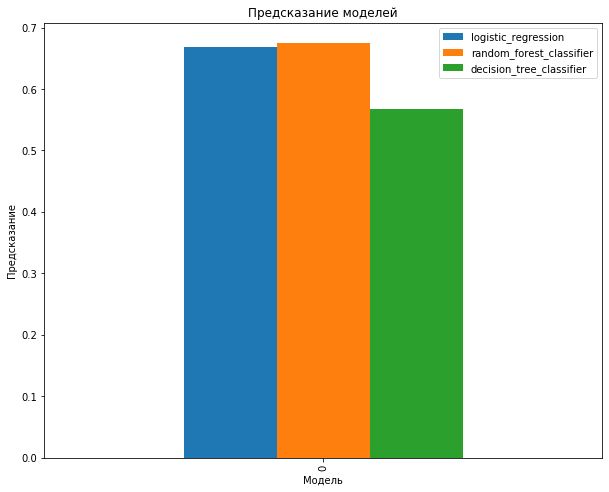

In [86]:
# с помощью графика выявляю лучшую модель
best_model = pd.DataFrame({'logistic_regression': log_score,
                           'random_forest_classifier': rfc_score,
                           'decision_tree_classifier': dtc_score}, index=[0])
best_model.plot(kind='bar', figsize=(10,8));
plt.xlabel('Модель');
plt.ylabel('Предсказание');
plt.title('Предсказание моделей');

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Из графика видно, что модель RandomForestClassifier предсказывает лучше остальных. Итог - выбираем модель RandomForestClassifier

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Хорошо, наглядно видно качество моделей на тестовой выборке.
</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Добавь вывод: какую модель выбираем.~~
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил
</div>

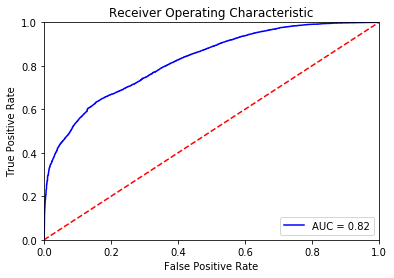

In [87]:
probs = model.predict_proba(features_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(target_test, preds)


roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
# подготавливаю данные для подсчета прибыли с помощью депозита
df_deposit_test_new = df_test_new.drop(columns=['is_canceled', 'arrival_date_month', 'season'], axis=0)
prediction_deposit = model.predict(df_deposit_test_new)

In [89]:
df_test['is_canceled_new'] = pd.Series(prediction_deposit, index=df_test.index)

In [90]:
df_deposit = df_test[['season', 
                  'arrival_date_month_new', 
                  'arrival_date_day_of_month', 
                  'total_nights', 
                  'reserved_room_type', 
                  'is_canceled_new', 
                      'is_canceled', 
                  'arrival_date_year']]

df_deposit = processing_data(df_deposit)

In [91]:
# # функция для подсчета прибыли с депозитами
# def profit_deposit(df):
#     profit = 0
#     nights_all = df['total_nights']
#     room = df['reserved_room_type']
#     percent = df['percent']
#     next_nights = df['next_month_day']
#     next_month = df['next_month']
#     percent_next = df['percent_next_month']
#     nights_now = abs(nights_all - next_nights)
#     # если  мы предсказали, что не омменит и правильно было, что не отменил, или предсказали,
#     # что отменит, но не отменил, то считаем, как и раньше
#     if (df['is_canceled_new'] == 0 and df['is_canceled'] == 0) or (df['is_canceled_new'] == 1 and df['is_canceled'] == 0):
    
#         if nights_all == 1:
#             if room == 'A':
#                 profit += PRICE_A + PRICE_A * percent - PRICE_CLEANING_A
#             if room == 'B':
#                 profit += PRICE_B + PRICE_B * percent - PRICE_CLEANING_B
#             if room == 'C':
#                 profit += PRICE_C + PRICE_C * percent - PRICE_CLEANING_C
#             if room == 'D':
#                 profit += PRICE_D + PRICE_D * percent - PRICE_CLEANING_D
#             if room == 'E':
#                 profit += PRICE_E + PRICE_E * percent - PRICE_CLEANING_E
#             if room == 'F':
#                 profit += PRICE_F + PRICE_F * percent - PRICE_CLEANING_F
#             if room == 'G':
#                 profit += PRICE_G + PRICE_G * percent - PRICE_CLEANING_G
    
    
#         if nights_all > 1:
#             if room == 'A':
#                 profit += ((PRICE_A + PRICE_A * percent) * nights_now 
#                            + (PRICE_A + PRICE_A * percent_next) * next_nights 
#                            - PRICE_CLEANING_A * np.ceil((nights_all / 2)))
#             if room == 'B':
#                 profit += ((PRICE_B + PRICE_B * percent) * nights_now 
#                            + (PRICE_B + PRICE_B * percent_next) * next_nights 
#                            - PRICE_CLEANING_B * np.ceil((nights_all / 2)))
#             if room == 'C':
#                 profit += ((PRICE_C + PRICE_C * percent) * nights_now 
#                            + (PRICE_C + PRICE_C * percent_next) * next_nights 
#                            - PRICE_CLEANING_C * np.ceil((nights_all / 2)))
#             if room == 'D':
#                 profit += ((PRICE_D + PRICE_D * percent) * nights_now 
#                            + (PRICE_D + PRICE_D * percent_next) * next_nights 
#                            - PRICE_CLEANING_D * np.ceil((nights_all / 2)))
#             if room == 'E':
#                 profit += ((PRICE_E + PRICE_E * percent) * nights_now 
#                            + (PRICE_E + PRICE_E * percent_next) * next_nights 
#                            - PRICE_CLEANING_E * np.ceil((nights_all / 2)))
#             if room == 'F':
#                 profit += ((PRICE_F + PRICE_F * percent) * nights_now 
#                            + (PRICE_F + PRICE_F * percent_next) * next_nights 
#                            - PRICE_CLEANING_F * np.ceil((nights_all / 2)))
#             if room == 'G':
#                 profit += ((PRICE_G + PRICE_G * percent) * nights_now 
#                            + (PRICE_G + PRICE_G * percent_next) * next_nights 
#                            - PRICE_CLEANING_G * np.ceil((nights_all / 2)))
                
#     # если  мы предсказали, что отменит и правильно было, что отменил, то мы просим депозит
#     if df['is_canceled_new'] == 1 and df['is_canceled_new'] == 1:
#         if room == 'A':
#             profit += ((PRICE_A + PRICE_A * percent) + PRICE_CLEANING_A) * 0.8
#         if room == 'B':
#             profit += ((PRICE_B + PRICE_B * percent) + PRICE_CLEANING_B) * 0.8
#         if room == 'C':
#             profit += ((PRICE_C + PRICE_C * percent) + PRICE_CLEANING_C) * 0.8
#         if room == 'D':
#             profit += ((PRICE_D + PRICE_D * percent) + PRICE_CLEANING_D) * 0.8
#         if room == 'E':
#             profit += ((PRICE_E + PRICE_E * percent) + PRICE_CLEANING_E) * 0.8
#         if room == 'F':
#             profit += ((PRICE_F + PRICE_F * percent) + PRICE_CLEANING_F) * 0.8
#         if room == 'G':
#             profit += ((PRICE_G + PRICE_G * percent) + PRICE_CLEANING_G) * 0.8
    
#     # если  мы предсказали, что не отменит, но правильно было, что отменил, то мы просто теряем деньги за уборку
#     if df['is_canceled_new'] == 1 and df['is_canceled_new'] == 0:      
#         if room == 'A':
#             profit -= PRICE_CLEANING_A
#         if room == 'B':
#             profit -= PRICE_CLEANING_B
#         if room == 'C':
#             profit -= PRICE_CLEANING_C
#         if room == 'D':
#             profit -= PRICE_CLEANING_D
#         if room == 'E':
#             profit -= PRICE_CLEANING_E
#         if room == 'F':
#             profit -= PRICE_CLEANING_F
#         if room == 'G':
#             profit -= PRICE_CLEANING_G     
        
#     return profit

In [92]:
def profit_deposit(df):
    profit = 0
    nights_all = df['total_nights']
    room = df['reserved_room_type']
    percent = df['percent']
    next_nights = df['next_month_day']
    next_month = df['next_month']
    percent_next = df['percent_next_month']
    nights_now = abs(nights_all - next_nights)
    
    if room == 'A':
        price = PRICE_A
        price_cleaning = PRICE_CLEANING_A
    elif room == 'B':
        price = PRICE_B
        price_cleaning = PRICE_CLEANING_B
    elif room == 'C':
        price = PRICE_C
        price_cleaning = PRICE_CLEANING_C
    elif room == 'D':
        price = PRICE_D
        price_cleaning = PRICE_CLEANING_D
    elif room == 'E':
        price = PRICE_E
        price_cleaning = PRICE_CLEANING_E
    elif room == 'F':
        price = PRICE_F
        price_cleaning = PRICE_CLEANING_F
    else:
        price = PRICE_G
        price_cleaning = PRICE_CLEANING_G
        
    if (df['is_canceled_new'] == 0 and df['is_canceled'] == 0) or (df['is_canceled_new'] == 1 and df['is_canceled'] == 0):
    
        if nights_all == 1:
            profit += price + price * percent - price_cleaning
    
        if nights_all > 1:
            profit += ((price + price * percent) * nights_now 
                           + (price + price * percent_next) * next_nights 
                           - price_cleaning * np.ceil((nights_all / 2)))
    
    if df['is_canceled_new'] == 1 and df['is_canceled_new'] == 1:
        profit += (price + price * percent + price_cleaning) * 0.8 - price_cleaning
                    
    if df['is_canceled_new'] == 1 and df['is_canceled_new'] == 0:      
        profit -= price_cleaning         
        
    return profit

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера ❌</b> 

~~Прибыль после внедрения депозитов зависит не только от предсказанных (назовем их predictions), но и от истинных значений is_canceled. Рассмотрим 4 случая:~~
    
~~- is_canceled=0 и predictions=0: бронь не отменена, прибыль вычисляется как стоимость проживания минус расходы за подготовку номера и уборку каждые 2 дня;~~
~~- is_canceled=0 и predictions=1: мы информируем клиента об его обязанности внести депозит при отмене брони, но бронь он не отменяет, поэтому прибыль вычисляется, как раньше: стоимость проживания минус расходы за подготовку номера и уборку каждые 2 дня;~~
~~- is_canceled=1 и predictions=0;~~  
~~- is_canceled=1 и predictions=1.~~
    
~~Последние 2 случая разбери самостоятельно. Обрати внимание, в условии написано, что размер депозита равен 80% от стоимости номера за одну ночь и расходов на разовую уборку, т.е. 80% от **суммы** стоимости номера и расходов на разовую уборку.   ~~     
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2 ❌</b> 

~~Осталась одна неточность в случае с df['is_canceled_new'] == 1 and df['is_canceled_new'] == 1: учитывай то, что отель в этом случае терпит убытки, связанные с подготовкой номера. ~~
    

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2 ✔️</b> 

Остальные случаи разобраны верно 👍 
    
~~Советую только упростить код так же, как я описала выше, для функции по расчету прибыли до внедрения депозитов.~~
</div>



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил
</div>

In [93]:
PROFIT_DEPOSIT = df_deposit.apply(profit_deposit, axis=1).sum()

In [94]:
PROFIT_DEPOSIT

62322770.0

In [95]:
pd.DataFrame({'not_deposit': PROFIT_NOT_DEPOSIT_TEST, 
              'deposit': PROFIT_DEPOSIT}, index=[0])

,not_deposit,deposit
0,48812600.0,62322770.0


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Прибыль без депозитов составляла 49 миллион, с помощью модели увеличиваем прибыль на 14 миллионов. Неплохой результат, модель окупается. 

### Шаг 5. Опишите портрет «ненадёжного» клиента

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Мини-вывод<a class="tocSkip"> </h2>
Чаще всего отказываются от брони в Августе, Сентябре, Июле, Июне, Октябре, Апреле; чем больше количество дней между датой бронирования и датой прибытия, тем больше шанс, что клиент откажется, чем больше количество изменений параметров заказа, количество специальных отметок и мест для автомобилей, тем меньше шанс того, что клиент откажется; больше всего отказов происходит в середине месяца, а именно: в 17 день, а больше всего броней происходит на 6 день, 17 и 26; если у человека есть 1 отмененный заказ, то больше шансов, что он отменит, чем если бы у него не было отмененного ранее заказа; наплыв бронирований был ближе к концу года, а также могу сказать, что в 25 неделю было больше всего отказов; в типе заказчика Transient шанс того, что заказ будет отменен 37 процентов.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера ✔️</b> 

Хорошо! ~~После исправления замечаний выводы немного изменятся.~~
</div>



### Шаг 6. Напишите общий вывод

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 3px solid indigo; padding: 15px"> 
<h2 align="center">Вывод<a class="tocSkip"> </h2>
С помощью данной работы я смог потренироваться, сделать различные исследования, закрепить материал, узнать много нового и обучить RandomForestClassifier, который увеличил прибыль на 14 миллионов. Выбрал я модель RandomForestClassifier.

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера ⚠️</b> 

~~В выводе укажи также саму итоговую модель.~~
</div>



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Исправил
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера:</b>    
    
Никита, ты провел качественное исследование 👍 
    
Этот проект – один из самых сложных, поэтому ошибок в нем не избежать. Доработать нужно следующее:
    
- задать одинаковые границы для отсева выбросов на обучающей и тестовой выборке;
- разобраться с графиками и выводами на шаге 2;
- корректно рассчитать затраты на уборку в случае нечетного числа ночей;
- не делить обучающую выборку на части;
- корректно провести OHE-кодирование;
- не проводить стандартную кросс-валидацию на увеличенной выборке;
- указать итоговую модель;
- корректно рассчитать прибыль после внедрения депозитов;
- исправить желтые замечания (их должно быть не больше двух).

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2:</b>    
    
Никита, спасибо! Осталось всего два замечания:
    
- разобраться с масштабированием признаков;
- корректно рассчитать прибыль после внедрения депозитов.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Спасибо за проверку работы, очень благодарен :)
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v3:</b>  
    
Никита, спасибо, все отлично!